In [1]:
import pandas
import tools
from rdkit import Chem

In [2]:
df = pandas.read_csv("../qm9_properties.csv", sep = "\t", index_col=0)
df

dsC7O2H10nsd_0001 dsC7O2H10nsd_0002  \
ID                                                              
A                                   3.15804           3.18389   
B                                   1.24363           1.17376   
C                                   1.10602            1.0523   
mu                                   1.1312            1.4619   
alpha                                 77.92             76.64   
homo                               -0.21236          -0.22287   
lumo                                0.02396           0.01851   
gap                                 0.23632           0.24138   
r2                                1176.6995         1210.2333   
zpve                               0.157714          0.158126   
u0                              -423.060648        -423.05829   
u                               -423.051482       -423.049306   
h                               -423.050538       -423.048361   
g                               -423.094516       -423.091847   
cv                                   34.695            34.434   
imaginary_frequencies                    []                []   
imaginary_frequency_count                 0                 0   

                          dsC7O2H10nsd_0003   dsC7O2H10nsd_0004  \
ID                                                                
A                                   2.48409             2.42825   
B                                   1.31168             1.50237   
C                                    1.0558             0.97394   
mu                                   1.6032               1.165   
alpha                                 78.88               78.88   
homo                               -0.19589             -0.2137   
lumo                                 0.0248             0.01582   
gap                                 0.22069             0.22952   
r2                                1226.8962           1221.2049   
zpve                               0.158053            0.158338   
u0                               -423.05914         -423.061194   
u                               -423.049643         -423.051893   
h                               -423.048698         -423.050949   
g                               -423.093848          -423.09572   
cv                                   34.719              34.394   
imaginary_frequencies                    []  [-9.6009, -8.8096]   
imaginary_frequency_count                 0                   2   

                          dsC7O2H10nsd_0005 dsC7O2H10nsd_0006  \
ID                                                              
A                                   2.53802           4.03195   
B                                    1.4141           0.92243   
C                                    0.9537           0.89742   
mu                                   1.0674            1.9674   
alpha                                 78.38             78.88   
homo                               -0.21149          -0.19836   
lumo                                0.01679           0.02641   
gap                                 0.22828           0.22477   
r2                                1237.6017         1389.1963   
zpve                                0.15842          0.158147   
u0                              -423.062407       -423.059519   
u                               -423.053191       -423.050129   
h                               -423.052247       -423.049185   
g                               -423.096619       -423.093925   
cv                                   34.327             34.72   
imaginary_frequencies             [-8.0319]                []   
imaginary_frequency_count                 1                 0   

                             dsC7O2H10nsd_0007            dsC7O2H10nsd_0008  \
ID                                                                            
A                                      4.13816                      3.18147   
B                                      0.91

In [3]:
im_freqs = df.loc["imaginary_frequency_count", :]

In [4]:
im_freqs

dsC7O2H10nsd_0001    0
dsC7O2H10nsd_0002    0
dsC7O2H10nsd_0003    0
dsC7O2H10nsd_0004    2
dsC7O2H10nsd_0005    1
                    ..
dsC7O2H10nsd_6091    1
dsC7O2H10nsd_6092    2
dsC7O2H10nsd_6093    1
dsC7O2H10nsd_6094    2
dsC7O2H10nsd_6095    2
Name: imaginary_frequency_count, Length: 6095, dtype: object

## Plot graph of im freqs 

Text(0, 0.5, 'Number of molecules')

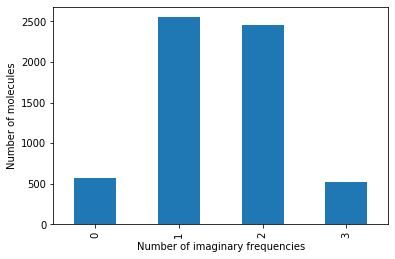

In [10]:
ax = im_freqs.value_counts().sort_index().plot.bar()
ax.set_xlabel("Number of imaginary frequencies")
ax.set_ylabel("Number of molecules")

## Write lists to files

In [6]:
zero_molecules = im_freqs[im_freqs==0].index.tolist()
zero_molecules

[]

In [5]:
for i in range(4):
    label = str(i) + "_frequencies"
    list_molecules = im_freqs[im_freqs==i].index.tolist()
    tools.write_list_to_file(list_molecules, label + ".txt")

## Produce grid images of some molecules in each list

In [8]:
# see https://www.rdkit.org/docs/GettingStartedInPython.html under
# "drawing molecules"
# Input: SDF/ smiles 
# for mol in mols: tmp = AllChem.Compute2DCoords(mol)
# Chem.Draw.MolsToGridImage(mols, molsPerRow=x)
# or w substructure match 
# backbone = mol
# submols = [x for x in mols if x.HasSubStructMatch(backbone)]
# for mol in submols: AllChem.GenerateDepictionMatching2DStructure(mol,backbone)
# img = Draw.MolsToGridImage(submols, molsPerRow=x)
# img.save("bla.png")